# Semester 1 Capstone Project (Group-4-0206)
## Company: Computing Vision

#### This notebook was a collaborative effort by the following group participants
#### Richmond Addo Danquah, Zommi Yao-Bai, Matt Frost, Scott Hills

##### Project presentation date: Mar-03-2023

# Project Overview

For this project, you will use exploratory data analysis and statistical methods to generate insights for a business stakeholder.

## Business Understaning (Problem)

Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

### Objective / Goals

The final analysis of the business problem should yield three concrete business recommendations for Computing Vision. Two recommendations based on your data communication and understanding and at least one recommendation following statistical testing.

## Data Understanding

Data for project has been provided by the following sources:
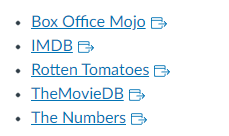

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files, while the data from IMDB has been provieed in a SQLite database.

# Exploratory Data Analysis, Cleanup and Preparation

###### Let's import the important python libraries that may be needed for  EDA

In [5]:
#Libraries Imported
import pandas as pd
import numpy as np

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import pearsonr
import sqlite3 #import sqlite 3 module
import os
import warnings

Map the directories to open and read the data files.

In [58]:
# Reading the CSV files into the instance
 # - Converted the TSV files to CSV Files
DATA_DIR = "../../Data/original_data/"

FILE_NAME1 = "bom.movie_gross.csv"
FILE_NAME2 = "tmdb.movies.csv"
FILE_NAME3 = "tn.movie_budgets.csv"
FILE_NAME4 = "rt_movie_info.csv"
FILE_NAME5 = "rt_reviews.csv"

BOM_movies_gross = pd.read_csv(f"{DATA_DIR}{FILE_NAME1}", index_col=0)
TMDB_movies = pd.read_csv(f"{DATA_DIR}{FILE_NAME2}")
TN_movie_budgets = pd.read_csv(f"{DATA_DIR}{FILE_NAME3}", index_col=0)
RT_movie_info = pd.read_csv(f"{DATA_DIR}{FILE_NAME4}")


In [ ]:
# Pandas functions for EPA

# df.head()         #Returns the first rows (Default 5) of the dataset
# df.tail()         #Returns the last rows (Default 5) of the dataset
# df.info()         # Getting a quick overviewd of the dataset
# df.shape()        # Shows the number of dimesions as well as the size of each dimension.
# df.size()         # Return an int representing the number of elements in the objects (Rows x Columns)
# df.ndim()         # Returns dimension of dataframe/series (1 for one dimension {series}, 2 for two deimensions {dataframe})
# df.describe()     #Return a statistical summary for the numerical columns present in the dataset.
# df.sample()       # used to generate a sample randomly either row or column. 
# df.isnull().sum() # checking for missing/null/na values in the data
# df.nunique()      # Return number of unique elements in the object
# df.columns()      # Returns the column lables of the dataframe
# df.value_counts() # Used to get a series contianing counts of unique values

### 1. Box Office Mojo

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### bom.movies_gross.csv details
- Data file has 3387 rows with 5 columns
- The columns are : title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
- There are instance of null data values, but the key column of 'title' is not missing any values. 
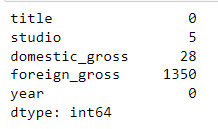
- There are no duplicate values for the key column 'title'
- We could choose to change foreign_gross and domestic gross data type to int.
- We will assume that the domestic and foreign gross revenue are in us dollars.
- The Studio column values are abbreviate, but due to lack of time we will not try to lookup and replace with the full studio names.

##### Conclusion:  This table will be heavily utilized to refrence Studio, Revenue and release year data elements for individual movie titles.

In [92]:
# BOM_movies_gross.head()
# BOM_movies_gross.tail()
# BOM_movies_gross.info() 
# BOM_movies_gross.describe()
# BOM_movies_gross.sample()  
BOM_movies_gross.isnull().sum()
# BOM_movies_gross.nunique()     
# BOM_movies_gross.value_counts()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
BOM_movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Sample ways to change formats if required.
#new_bom_movies['domestic_gross']=  BOM_movies_gross['domestic_gross'].astype(int) # Changing data type to Int
#new_bom_movies['year']= pd.to_datetime(bom_movies.year, format='%Y%') # Changing data type to date

<Figure size 720x432 with 0 Axes>

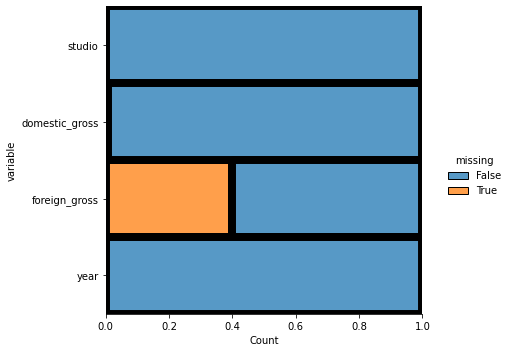

In [70]:
# Visualizing data for missing value
plt.figure(figsize=(10,6))
sns.displot(
    data= BOM_movies_gross.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
BOM_movies_gross.image = plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### 2. IMDB

In [21]:
# Connecting to the db file
dbfile ="../../Data/im_combined.db"

# Create a SQL connection to our SQLite database
conn = sqlite3.connect(dbfile)

# reading all table names
SQLQuery_SQLite_Master= """ 
SELECT name FROM sqlite_master WHERE type = 'table'
;""" 
df_sql_tables = pd.read_sql(SQLQuery_SQLite_Master, conn) 
df_sql_tables

# **Note - Only the IMDB_ tables were provided in the source database. The other tables were created manually 
#    from the csv source files. 

,name
0,IMDB_movie_basics
1,IMDB_directors
2,IMDB_known_for
3,IMDB_movie_akas
4,IMDB_movie_ratings
5,IMDB_persons
6,IMDB_principals
7,IMDB_writers
8,BOM_movie_gross
9,movie_reviews


In [82]:
# We can write SQL against the database to do many of the same checks that we can use in Pandas.
# df.head()
# df.tail()
# df.info() 
# df.describe()
# df.sample()  

SQLQuery_1= """ 
select * 
from IMDB_movie_basics a
;""" 
IMDB_movie_bases_df = pd.read_sql(SQLQuery_1, conn) 

## Using pandas to check the SQL results loaded into a datafram
# IMDB_movie_bases_df.head()
# IMDB_movie_bases_df.tail()
# IMDB_movie_bases_df.info() 
IMDB_movie_bases_df.describe()
# IMDB_movie_bases_df.value_counts()


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [87]:
# checking for duplicate key values for basic table.
SQLQuery_IMDB2 = """ 
select 
a.movie_id,
a.primary_title
,count(*)
from IMDB_movie_basics a
group by a.primary_title
having count(*) > 1
order by count(*) desc
;""" 
IMDB_movie_bases_df2 = pd.read_sql(SQLQuery_IMDB2, conn) 
IMDB_movie_bases_df2


,movie_id,primary_title,count(*)
0,tt2075392,Home,24
1,tt1848871,The Return,20
2,tt1441940,Broken,20
3,tt1618376,Homecoming,16
4,tt10274594,Alone,16
...,...,...,...
6177,tt1869226,100% Love,2
6178,tt8032828,100 Milioni di bracciate,2
6179,tt3180640,10 Minutes,2
6180,tt6085916,(aguirre),2


In [ ]:
# Be sure to close the connection when complete
#con.close()

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via SQLite DB Viewer, Excel and the use of Pandas functions to review and clean data set where necessary.

##### IMDB SQLite Database details

   
##### Conclusion:  This table will be heavily utilized to produce Revenue, Cost and Profitablity values.


### 3. The Numbers

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### tn.movie_budgets details
- Data file has 5782 rows with 6 columns
- The columns are : id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'
- There is null data values in the file.
- There are a duplicate values for the key column 'movie', but instead of removing them here we will handle in SQL when we load this raw data to a DB Table.
- The release_date column data type needs to be changed to datetime
- We will assume that the production_budget, domestic_growth and worldwide_gross are in us dollars.
   - We should format these 3 columns as interger in the CSV to remove the currency symbol and have it loaded into the a new database table as an ingeger.
   
##### Conclusion:  This table will be heavily utilized to produce Revenue, Cost and Profitablity values.


In [64]:
# TN_movie_budgets.head()
# TN_movie_budgets.tail()
# TN_movie_budgets.info() 
TN_movie_budgets.describe()
# TN_movie_budgets.sample()  
# TN_movie_budgets.isnull().sum()
# TN_movie_budgets.nunique()     
# TN_movie_budgets.value_counts()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


### 4. TheMovie DB

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### tmdb.movies details
- Data file contains 26517 rows and 10 columns.
- The columns are named : 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date', 'title', 'vote_average', 'vote_count'
- This is a fully populated file and does not contain any null values to consider.
- There are a duplicate values for the key column 'movie', but instead of removing them here we will handle in SQL when we load this raw data to a DB Table.
- We will have to use either the original_title or title as the key to join to other datasets.
- The release_date column data type is already set and formatted as a date. In a SQLite table this will be formatted as text.
- We don't have any refrence of a scale of a popularity score column. We will have to assume the larger the numerical score value correlates to higher popularity. (bigger is better)
- Genre_ids are shows as numerical values and we have not translation refrence to what Genre titles those ID values relate to.
   
   
##### Conclusion:  We don't belive that we can make full use of this dataset, but will pick and choose items like popularity to use as a reference for a correlation between higer profit/revenue = higher popularity value


In [63]:
# TMDB_movies.head()
# TMDB_movies.tail()
# TMDB_movies.info() 
# TMDB_movies.describe()
# TMDB_movies.sample()  
# TMDB_movies.isnull().sum()
TMDB_movies.nunique()     
# TMDB_movies.value_counts()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

### 5. Rotten Tomatoes

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.



##### rt_movie_info  file details
- Data file has 1560 rows with 12 columns.
- The columns are named : 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'
- Other than Id column, the rest of the data columns contain missing/null values.
   - The ID columns makes it easy to join the two RT files together, but we don't have a way to joing this data to other data sources.
- The columns that have more than 2/3rd of missing values would be potential candidates to be dropped. 
        Studio
        box_office
        currency
- Columns that would need to have the formats updated. 
    - runtime column data type needs to be changed to datetime
    - rating columns to integer
    - Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values

   
##### Initial Conclusion:  It doesn't appear that we can rely on these files and we have the mostly the same, and more reliable and complete, data in other data source files. No good reliable way to join the RT data sets to other data sources.


In [65]:
# RT_movie_info.head()
# RT_movie_info.tail()
# RT_movie_info.info() 
# RT_movie_info.describe()
# RT_movie_info.sample()  
# RT_movie_info.isnull().sum()
RT_movie_info.nunique()     
# RT_movie_info.value_counts()

id              1560
synopsis        1497
rating             6
genre            299
director        1125
writer          1069
theater_date    1025
dvd_date         717
currency           1
box_office       336
runtime          142
studio           200
dtype: int64

## Final Data Structures


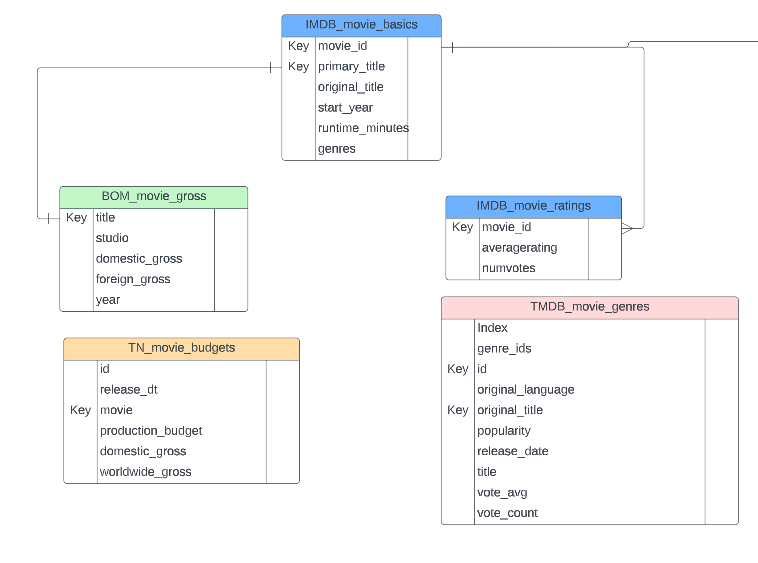

- Show that we created new table structures to load CSV data into table.

give an example of how we created the new VIEW Record  and explain that we used a utility (DB Browser for SQLite) to import data
from csv to the new tables.

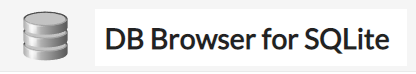

In [ ]:
#This is an example of the SQL used to create the new VIEW record in the Database

SQLQuery_Crate_View_table = """
CREATE TABLE "VIEW_movie_budgets" (
"Title" TEXT,
"studio" TEXT,
"TNWorlwideGross" INTEGER,
"TNDomesticGross" INTEGER,
"ComputedForeignGross" INTEGER,
"TNBudget/Cost" INTEGER,
"Computed_Profit_Loss" INTEGER,
"year" INTEGER,
"release_date" TEXT
);"""
# pd.read_sql(SQLQuery_Populate_View, conn) 

# conn.commit()

In [95]:
# Construct and run this sql statement to join the 3 datasets of  Box office movies, The numbers and the movie basics record from the
#IMDB database.

SQLQuery_Populate_View = """ 
Select 
DISTINCT
imdb.movie_id
,tn.movie 'Title'
,bom.studio
,imdb.genres
,tn.worldwide_gross 'TN Worlwide Gross'
,tn.domestic_gross 'TN Domestic Gross'
,(tn.worldwide_gross - tn.domestic_gross) as 'Computed Foreign Gross'
,tn.production_budget 'TN Budget / Cost'
,(tn.worldwide_gross - tn.production_budget) as 'Computed_Profit_Loss'
,bom.year
,tn.release_date
,(select a.averagerating from IMDB_movie_ratings a where imdb.movie_id = a.movie_id ) as 'IMDB Average Rating'
from TN_movie_budgets_formatted tn,
BOM_movie_gross bom, 
IMDB_movie_basics imdb
where 1=1
and bom.title = tn.movie
and imdb.primary_title = tn.movie
;""" 
VIEW_table_df = pd.read_sql(SQLQuery_Populate_View, conn) 

VIEW_table_df.describe()
VIEW_table_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_id                1602 non-null   object 
 1   Title                   1602 non-null   object 
 2   studio                  1602 non-null   object 
 3   genres                  1576 non-null   object 
 4   TN Worlwide Gross       1602 non-null   int64  
 5   TN Domestic Gross       1602 non-null   int64  
 6   Computed Foreign Gross  1602 non-null   int64  
 7   TN Budget / Cost        1602 non-null   int64  
 8   Computed_Profit_Loss    1602 non-null   int64  
 9   year                    1602 non-null   int64  
 10  release_date            1602 non-null   object 
 11  IMDB Average Rating     1413 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 150.3+ KB


In [99]:
# SQL Query Select from the create View table 

SQLQuery_View_Movie_Budgets = """ 
select * from VIEW_movie_budgets
order by TNWorlwideGross desc
;""" 
VIEW_movie_budgets = pd.read_sql(SQLQuery_View_Movie_Budgets, conn) 

VIEW_movie_budgets.head(15)


,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date
0,Avengers: Infinity War,BV,2048134200,678815482,1369318718,300000000,1748134200,2018,4/27/2018
1,Jurassic World,Uni.,1648854864,652270625,996584239,215000000,1433854864,2015,6/12/2015
2,Furious 7,Uni.,1518722794,353007020,1165715774,190000000,1328722794,2015,4/3/2015
3,Avengers: Age of Ultron,BV,1403013963,459005868,944008095,330600000,1072413963,2015,5/1/2015
4,Black Panther,BV,1348258224,700059566,648198658,200000000,1148258224,2018,2/16/2018
5,Jurassic World: Fallen Kingdom,Uni.,1305772799,417719760,888053039,170000000,1135772799,2018,6/22/2018
6,Frozen,BV,1272469910,400738009,871731901,150000000,1122469910,2013,11/22/2013
7,Incredibles 2,BV,1242520711,608581744,633938967,200000000,1042520711,2018,6/15/2018
8,The Fate of the Furious,Uni.,1234846267,225764765,1009081502,250000000,984846267,2017,4/14/2017
9,Iron Man 3,BV,1215392272,408992272,806400000,200000000,1015392272,2013,5/3/2013


In [91]:
# Using the View Table we can use subselects to bring in other data elements from different data sources that couldn't be access
# by joining in the main select because we would sacrifice our total row count of moview rows we have with out selecte population
# 1255 total movie rows.

SQLQuery_VeiwSumm = """ 
Select 
a.*
,(Select b.genres from IMDB_movie_basics b where b.primary_title = a.title) as Genres
,(Select SUBSTR(e.genres,1,INSTR(e.genres,',') -1) from IMDB_movie_basics e where e.primary_title = a.title ) as 'Main_Genres'
,(Select c1.averagerating from IMDB_movie_basics b1, IMDB_movie_ratings c1 where  c1.movie_id = b1.movie_id and b1.primary_title = a.title) as AverageRating
,(Select d1.popularity from TMDB_movie_genres d1 where d1.original_title = a.title) as TN_Popularity
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category = 'producer' 
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1) as 'Producer'
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category = 'director' 
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1 ) as 'Director'
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category in ('actor','actress')
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1) as 'Actor'
from VIEW_movie_budgets a
order by Computed_Profit_Loss desc
;""" 
VIEW_summary_final_df = pd.read_sql(SQLQuery_VeiwSumm, conn) 

VIEW_summary_final_df.head()
# VIEW_summary_final_df.tail()
# VIEW_summary_final_df.info() 

,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date,Genres,Main_Genres,AverageRating,TN_Popularity,Producer,Director,Actor
0,Avengers: Infinity War,BV,2048134200,678815482,1369318718,300000000,1748134200,2018,4/27/2018,"Action,Adventure,Sci-Fi",Action,8.5,80.773,None,Anthony Russo,Robert Downey Jr.
1,Jurassic World,Uni.,1648854864,652270625,996584239,215000000,1433854864,2015,6/12/2015,"Action,Adventure,Sci-Fi",Action,7.0,20.709,Patrick Crowley,Colin Trevorrow,Chris Pratt
2,Furious 7,Uni.,1518722794,353007020,1165715774,190000000,1328722794,2015,4/3/2015,"Action,Crime,Thriller",Action,7.2,20.396,Michael Fottrell,James Wan,Vin Diesel
3,Black Panther,BV,1348258224,700059566,648198658,200000000,1148258224,2018,2/16/2018,"Action,Adventure,Sci-Fi",Action,7.3,2.058,Kevin Feige,Ryan Coogler,Chadwick Boseman
4,Jurassic World: Fallen Kingdom,Uni.,1305772799,417719760,888053039,170000000,1135772799,2018,6/22/2018,"Action,Adventure,Sci-Fi",Action,6.2,34.958,Belén Atienza,J.A. Bayona,Chris Pratt


# Business Recomendation 1

# Business Recomendation 2

# Business Recomendation 3

# Conclusion and Wrap-Up